https://en.wikipedia.org/wiki/FitzHugh%E2%80%93Nagumo_model

In [1]:
%pylab inline
from scipy.integrate import odeint

Populating the interactive namespace from numpy and matplotlib


<img src="./fhn_eq1.png"/>

In [2]:
a=0.7
b=0.8
τ=12.5

by wpisać symbol z alfabetu greckiego napisz np. "\tau" i naciśnij TAB

Ustaw stałe pobudzenie $I_{ext}$. Wypróbuj wartości 1, 0.35, 0.33.

In [3]:
I_1 = 1
I_2 = 0.35
I_3 = 0.33

In [62]:
def dXdt(X,t,I,a,b,τ):
    v, w = X
    
    dv = v - v**3.0 / 3 - w + I
    dw = (v + a - b*w)/τ
    
    return [dv, dw]

In [71]:
T = linspace(0, 150, 100000)
x0 = array([0.0,0.])

par1 = tuple([I_1,a,b,τ])
par2 = tuple([I_2,a,b,τ])
par3 = tuple([I_3,a,b,τ])


x1 = odeint(dXdt,x0,T,par1)
x2 = odeint(dXdt,x0,T,par2)
x3 = odeint(dXdt,x0,T,par3)

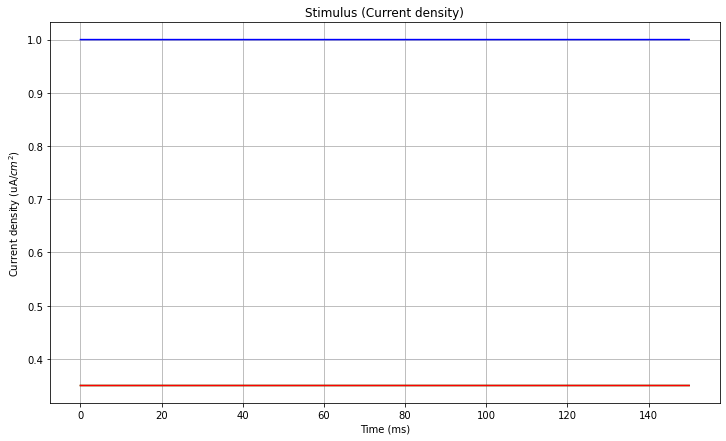

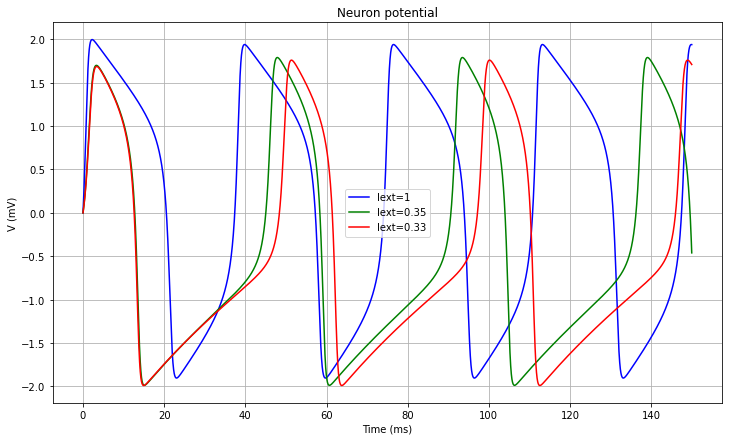

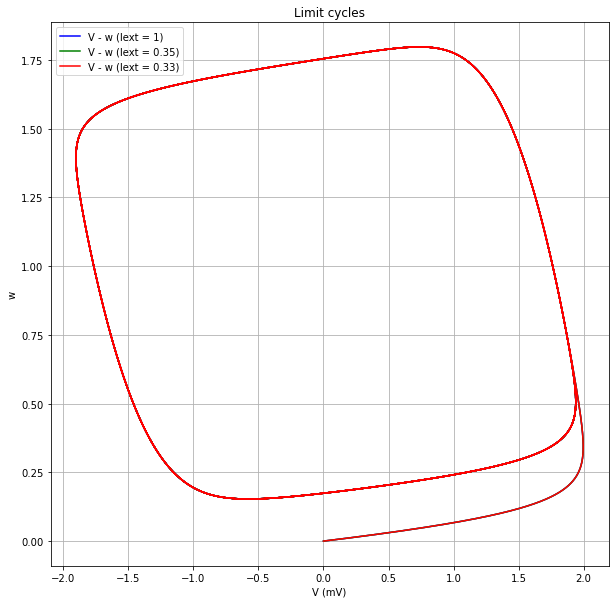

In [72]:
fig, ax = subplots(figsize=(12, 7))
ax.plot(T,full(len(T),I_1),label="Iext=1",c="blue")
ax.plot(T,full(len(T),I_2),label="Iext=0.35",c="green")
ax.plot(T,full(len(T),I_2),label="Iext=0.33",c="red")
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Current density (uA/$cm^2$)')
ax.set_title('Stimulus (Current density)')
grid()

# Neuron potential
fig, ax = subplots(figsize=(12, 7))
ax.plot(T, x1[:, 0],c="blue",label="Iext=1")
ax.plot(T, x2[:, 0],c="green",label="Iext=0.35")
ax.plot(T, x3[:, 0],c="red",label="Iext=0.33")
ax.set_xlabel('Time (ms)')
ax.set_ylabel('V (mV)')
ax.set_title('Neuron potential')
ax.legend()
grid()

# Trajectories with limit cycles
fig, ax = subplots(figsize=(10, 10))
ax.plot(x1[:, 0], x1[:, 1], label='V - w (Iext = 1)',c="blue")
ax.plot(x1[:, 0], x1[:, 1], label='V - w (Iext = 0.35)',c="green")
ax.plot(x1[:, 0], x1[:, 1], label='V - w (Iext = 0.33)',c="red")
ax.set_xlabel("V (mV)")
ax.set_ylabel("w")
ax.set_title('Limit cycles')
ax.legend()
grid()